In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
fish = pd.read_csv('Fish.csv', encoding='ISO-8859-1')
fish.head()

,ÈÀSpecies,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
ÈÀSpecies    159 non-null object
Weight        159 non-null float64
Length1       159 non-null float64
Length2       159 non-null float64
Length3       159 non-null float64
Height        159 non-null float64
Width         159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
fish.drop(['ÈÀSpecies','Length1','Length2','Length3'], axis=1, inplace=True)

In [5]:
fish.head()

,Weight,Height,Width
0,242.0,11.5200,4.0200
1,290.0,12.4800,4.3056
2,340.0,12.3778,4.6961
3,363.0,12.7300,4.4555
4,430.0,12.4440,5.1340


In [6]:
x = fish[['Height']]
y = fish['Weight']

In [7]:
print(x)
print(y)

      Height
0    11.5200
1    12.4800
2    12.3778
3    12.7300
4    12.4440
..       ...
154   2.0904
155   2.4300
156   2.2770
157   2.8728
158   2.9322

[159 rows x 1 columns]
0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
## Melatih (training) model
from sklearn.linear_model import LinearRegression
# x = x.reshape(-1,1)
# Create model
model_linreg = LinearRegression()
# Training model
model_linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

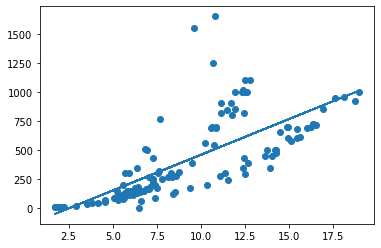

In [12]:
## Menampilkan grafik hasil regresi
plt.scatter(x_train, y_train)
plt.plot(x_train, model_linreg.predict(x_train))
plt.show()

In [13]:
x2 = fish[['Height','Width']]
y2 = fish['Weight']

In [47]:
print(x2)
print(y2)

      Height   Width
0    11.5200  4.0200
1    12.4800  4.3056
2    12.3778  4.6961
3    12.7300  4.4555
4    12.4440  5.1340
..       ...     ...
154   2.0904  1.3936
155   2.4300  1.2690
156   2.2770  1.2558
157   2.8728  2.0672
158   2.9322  1.8792

[159 rows x 2 columns]
0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64


In [15]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2)

In [50]:
## Melatih (training) model
from sklearn.linear_model import LinearRegression
# x = x.reshape(-1,1)
# Create model
model_linreg = LinearRegression()
# Training model
model_linreg.fit(x_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_pred = model_linreg.predict(x_test2)

MSE: 288934.542159958


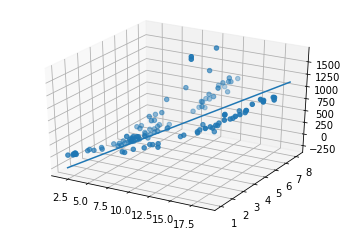

In [54]:
x2fit = np.linspace((1.7,1), (18.9,8.1), 1000)
y2fit = model_linreg.predict(x2fit)

x_train=np.array(x_train2)
y_train=np.array(y_train2)
summation=0
n = len(y_pred)
for i in range(0,n):
    difference = y_pred[i]-y_test.values[i]
    squared_difference = difference**2
    summation = summation + squared_difference
MSE = summation/n
print ("MSE:",MSE)
fig=plt.figure()
ax3=plt.gca(projection='3d')
ax3.plot(x2fit[:,0],x2fit[:,1],y2fit)
ax3.scatter3D(x_train[:,0],x_train[:,1],y_train)
plt.show()